In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "gdrive/My Drive/Credit Risk Model Subject/Data"
# mount vào google drive thư mục có chứa data

Mounted at /content/gdrive


In [ ]:
import os
path = "gdrive/My Drive/Credit Risk Model Subject/Data"
print(os.path.isdir(path))
print(os.path.isfile(path + "/credit_risk_dataset.csv"))
# kiểm tra xem đường dẫn có tồn tại hay không

True
True


# **2-class classification**
- **0: Không có rủi ro (Tốt)**
- **1: Có rủi ro (Xấu)**






### **1. Import dữ liệu**

In [ ]:
import pandas as pd #thư viện làm việc với data frame
import seaborn as sns #vẽ hình
import numpy as np # thư viện làm việc với con số
import matplotlib.pyplot as plt #vẽ hình

data = pd.read_csv(path + "/credit_risk_dataset.csv") # đọc dữ liệu từ đương dẫn phía trên
 # .read_csv
 # .read_excel

In [ ]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### **2. Thống kê mô tả**

In [ ]:
from copy import deepcopy
data_2 = deepcopy(data) 

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  7


In [ ]:
categorical_features = [x for x in data.columns if (x not in numerical_features and x != 'loan_status')]
print('Number of numerical features: ', len(categorical_features))

Number of numerical features:  4


In [ ]:
for col in categorical_features:
    data_2[col] = data_2[col].astype('object')

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
data_2[numerical_features].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [ ]:
data_2[categorical_features].describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


Note: 
1. Max age; Max person employee length
2. Chia 2 bộ data ( mã hóa dữ liệu sang binary và để 1 bộ ở kiểu float --> chạy corr; 1 bộ chia categorical và numerical --> chạy thống kê mô tả)

In [ ]:
data_2.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
data_2 = data_2.dropna()

In [ ]:
data_2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
aloan_status = data['loan_status']
del data['loan_status']
data['default'] = loan_status
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,default
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


### **3. Correlation**

In [ ]:
data.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,default
person_age,1.000000,0.178899,0.165787,0.054172,0.011019,-0.041065,0.859544,-0.023333
person_income,0.178899,1.000000,0.136825,0.265879,-0.001381,-0.251511,0.117076,-0.139938
person_emp_length,0.165787,0.136825,1.000000,0.110759,-0.056405,-0.055167,0.146336,-0.082638
loan_amnt,0.054172,0.265879,0.110759,1.000000,0.145904,0.577399,0.045294,0.113550
loan_int_rate,0.011019,-0.001381,-0.056405,0.145904,1.000000,0.123500,0.015371,0.339350
loan_percent_income,-0.041065,-0.251511,-0.055167,0.577399,0.123500,1.000000,-0.030080,0.379689
cb_person_cred_hist_length,0.859544,0.117076,0.146336,0.045294,0.015371,-0.030080,1.000000,-0.015649
default,-0.023333,-0.139938,-0.082638,0.113550,0.339350,0.379689,-0.015649,1.000000


Biến Age có tương quan cao đối với biến cb_person_cred_hist_length (Độ dài lịch sử tín dụng): vì tuổi tác càng cao thì độ dài lịch sử tín dụng của người đó được ghi nhận và theo dõi càng dài. (~86%)

In [ ]:
pd.DataFrame(data.corr().iloc[:-1,-1])

,default
person_age,-0.023333
person_income,-0.139938
person_emp_length,-0.082638
loan_amnt,0.113550
loan_int_rate,0.339350
loan_percent_income,0.379689
cb_person_cred_hist_length,-0.015649


In [ ]:
correlation = data.corr().iloc[:-1,-1].values
np.absolute(correlation)

array([0.02333261, 0.13993834, 0.08263825, 0.11354996, 0.33934996,
       0.37968875, 0.01564939])

In [ ]:
column_selected = [x for x in data.columns if (x != 'default' and x not in categorical_features)]
column_selected

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [ ]:
features_importances_corr = pd.DataFrame({'FeatureName': data[column_selected].columns[0:len(data[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

,FeatureName,Pearson Correlation with target
5,loan_percent_income,0.379689
4,loan_int_rate,0.339350
1,person_income,-0.139938
3,loan_amnt,0.113550
2,person_emp_length,-0.082638
0,person_age,-0.023333
6,cb_person_cred_hist_length,-0.015649


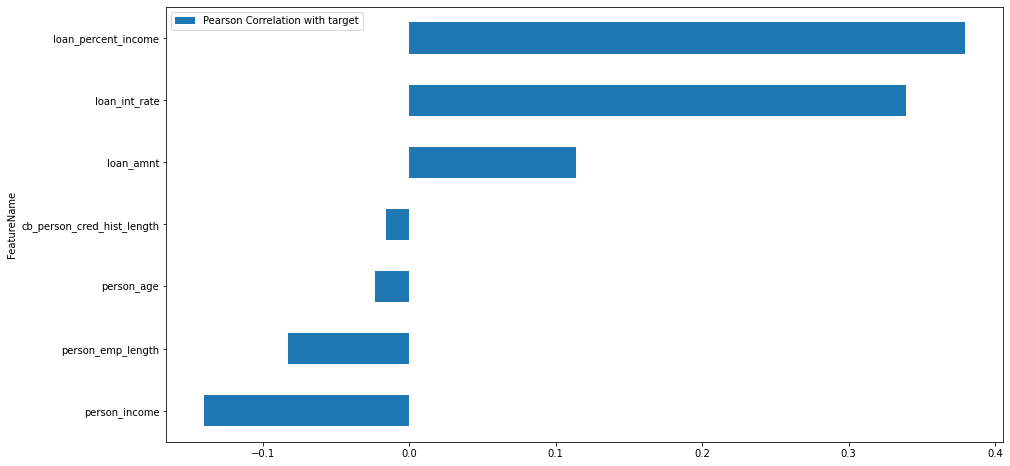

In [ ]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

In [ ]:
# Create function for AUC, ROC that will be applied in the following models

from sklearn.metrics import roc_curve, auc

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

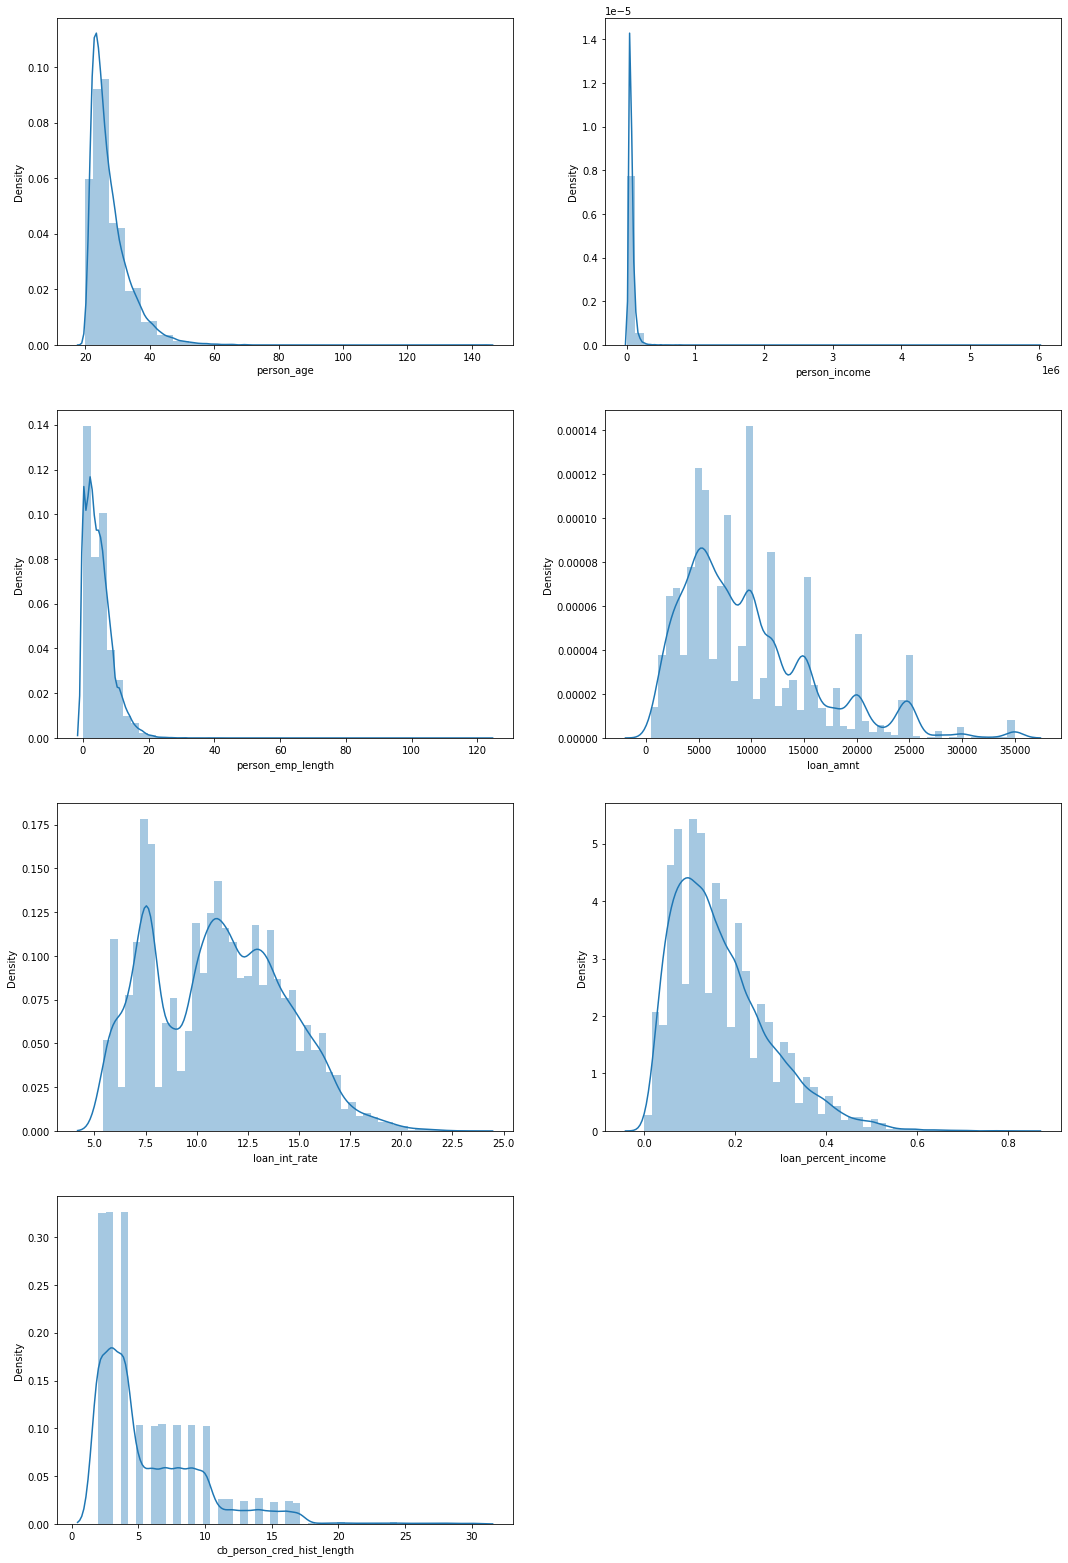

In [ ]:
plt.figure(figsize=(18,100))
def chart(variables):
  x=1
  for i in variables:
    plt.subplot(14,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

chart(numerical_features)

### **4. Random Forest Feature Importance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Mã hóa dữ liệu thuộc tính categorical

In [ ]:
for i in range(len(categorical_features)):
  re_value = data[categorical_features[i]].value_counts().reset_index()
  re_value['new_value'] = re_value.index
  for j in range(len(re_value)):
    data[categorical_features[i]] = data[categorical_features[i]].replace(re_value['index'][j], re_value['new_value'][j])
data[categorical_features]  

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,0,3,3,1
1,2,0,1,0
2,1,1,2,0
3,0,1,2,0
4,0,1,2,1
...,...,...,...,...
32576,1,3,2,0
32577,1,3,0,0
32578,0,5,1,0
32579,1,3,1,0


In [ ]:
for i in categorical_features:
  test = data[i].value_counts()
  print(test)

0    14551
1    11801
2     2192
3       94
Name: person_home_ownership, dtype: int64
0    5704
1    5293
2    5001
3    4877
4    4565
5    3198
Name: loan_intent, dtype: int64
0    9402
1    9151
2    5699
3    3248
4     870
5     209
6      59
Name: loan_grade, dtype: int64
0    23535
1     5103
Name: cb_person_default_on_file, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  int64  
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  int64  
 5   loan_grade                  28638 non-null  int64  
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_percent_income         28638 non-null  float64
 9   cb_person_default_on_file   28638 non-null  int64  
 10  cb_person_cred_hist_length  28638 non-null  int64  
 11  default                     28638 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.8 MB


In [ ]:
target = ['default']
features = list(set(list(data.columns)) - set(target))

In [ ]:
print('Target: ', target)
print('Features: ', features)


Target:  ['default']
Features:  ['loan_grade', 'loan_amnt', 'person_emp_length', 'loan_intent', 'cb_person_default_on_file', 'person_income', 'cb_person_cred_hist_length', 'loan_percent_income', 'person_home_ownership', 'person_age', 'loan_int_rate']


In [ ]:
X = data[features].values
y = data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10
0,-1.049057,0.054270,0.291566,-1.354686,-0.465646,0.053734,2.279674,-0.277168,0.658016,1.786402,-1.508018
1,-1.049057,-0.735673,1.495065,-0.145652,-0.465646,0.214106,1.041564,-1.029114,0.658016,-0.115242,-0.941335
2,1.513456,-0.008925,0.050866,-1.354686,2.147555,-0.058525,-0.444169,-0.183175,-0.890276,-0.432183,1.059089
3,1.513456,-0.261707,0.532266,-0.145652,-0.465646,0.053734,1.041564,-0.559148,0.658016,-0.115242,1.535971
4,0.659285,-0.467092,0.050866,-0.750169,2.147555,0.294291,-0.939413,-0.841127,-0.890276,-0.749123,1.297530
...,...,...,...,...,...,...,...,...,...,...,...
25769,1.513456,-0.664578,1.735765,-0.145652,2.147555,0.117883,0.051076,-0.935121,2.206309,0.043228,0.504792
25770,0.659285,-0.577684,0.291566,-1.354686,-0.465646,-0.635861,-0.691791,0.474778,-0.890276,-0.749123,0.192032
25771,0.659285,-0.577684,-0.911932,-0.750169,2.147555,-0.683973,-0.444169,0.756757,2.206309,-0.907594,0.507889
25772,-0.194886,2.424098,-0.671233,-0.750169,-0.465646,2.539487,1.041564,-0.559148,-0.890276,0.360169,0.427376


***a. Prediction***

In [ ]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[2220   16]
 [ 183  445]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2236
           1       0.97      0.71      0.82       628

    accuracy                           0.93      2864
   macro avg       0.94      0.85      0.89      2864
weighted avg       0.93      0.93      0.93      2864

Random Forest accuracy:  0.9305167597765364


***b. Feature Importance***

In [ ]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
7,loan_int_rate,0.224250
5,loan_grade,0.142941
0,person_age,0.115901
10,cb_person_cred_hist_length,0.112243
8,loan_percent_income,0.105598
3,person_emp_length,0.073958
1,person_income,0.071884
2,person_home_ownership,0.061934
9,cb_person_default_on_file,0.046347
6,loan_amnt,0.034517


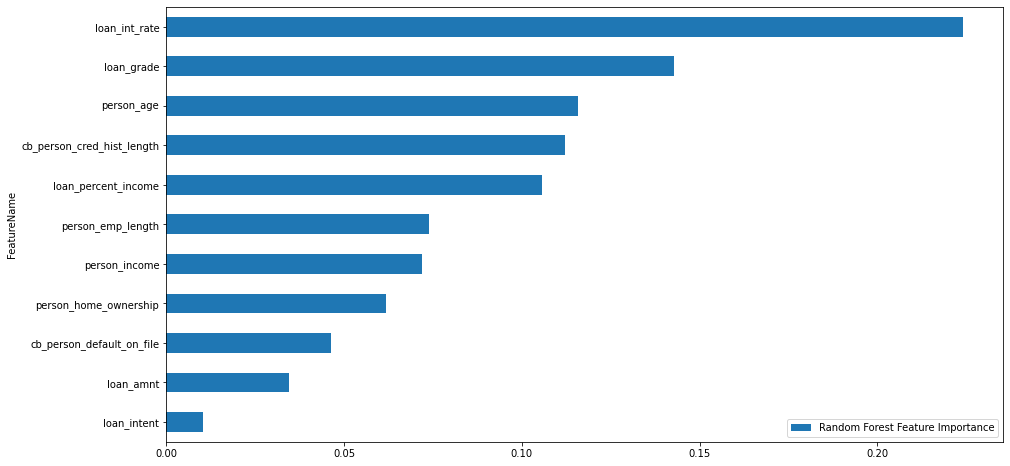

In [ ]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

***c. ROC Curve***

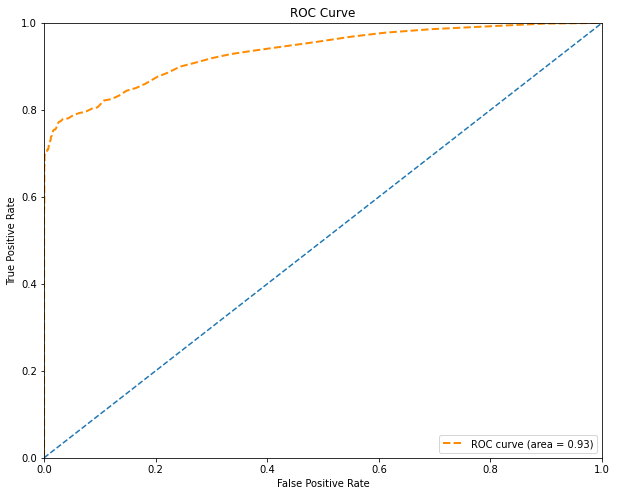

In [ ]:
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

### **5. Using Logistic Regression to predict default**

***a. Prediction***

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train.ravel())

y_pred = LR_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[2136  100]
 [ 324  304]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2236
           1       0.75      0.48      0.59       628

    accuracy                           0.85      2864
   macro avg       0.81      0.72      0.75      2864
weighted avg       0.84      0.85      0.84      2864

Logistic Regression accuracy:  0.8519553072625698


In [ ]:
df_report = pd.DataFrame({'Ground Truth':y_test.ravel(), 'Prediction':y_pred.ravel()})
df_report

,Ground Truth,Prediction
0,0,0
1,1,1
2,0,0
3,1,0
4,1,0
...,...,...
2859,0,0
2860,0,0
2861,1,0
2862,0,0


In [ ]:
# Tải file excel kết quả về gdrive
df_report.to_excel(r'gdrive/My Drive/Credit Risk Model Subject/predicted_credit_risk.xlsx', index=False)

***b. Feature Importance***

In [ ]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,Logistic Regression Feature Importance
7,loan_int_rate,1.301496
0,person_age,1.177321
8,loan_percent_income,-0.598536
1,person_income,-0.569907
3,person_emp_length,0.248080
10,cb_person_cred_hist_length,-0.132593
4,loan_intent,-0.038652
9,cb_person_default_on_file,-0.032627
5,loan_grade,0.031269
2,person_home_ownership,-0.016271


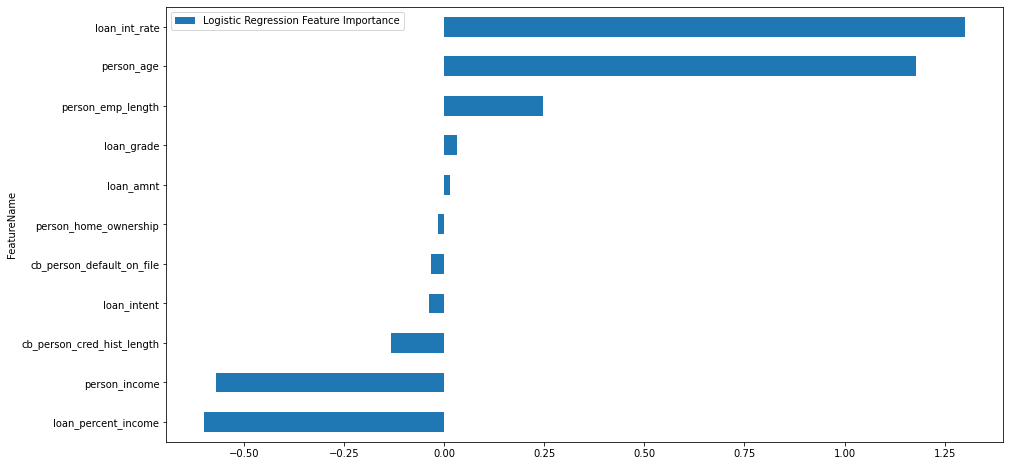

In [ ]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

***c. ROC Curve***

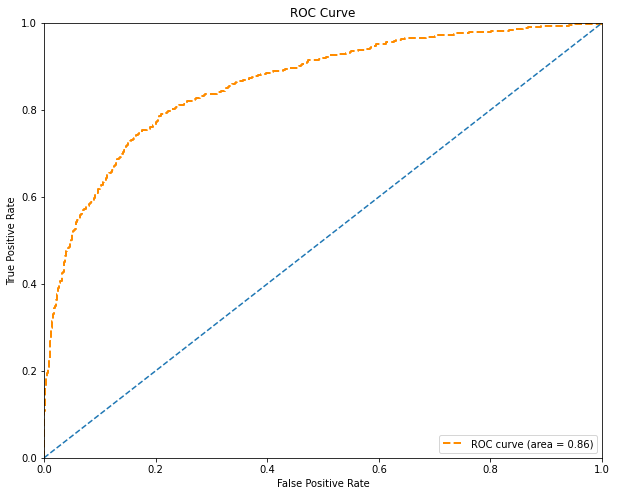

In [ ]:
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

### **6. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

***a. Prediction***

In [ ]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

[[2081  155]
 [ 147  481]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2236
           1       0.76      0.77      0.76       628

    accuracy                           0.89      2864
   macro avg       0.85      0.85      0.85      2864
weighted avg       0.90      0.89      0.89      2864

Decision Tree accuracy:  0.8945530726256983


***b. Feature Importance***

In [ ]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
7,loan_int_rate,0.237105
0,person_age,0.168909
8,loan_percent_income,0.146340
5,loan_grade,0.126611
3,person_emp_length,0.090265
2,person_home_ownership,0.058908
10,cb_person_cred_hist_length,0.051386
9,cb_person_default_on_file,0.049847
1,person_income,0.039025
6,loan_amnt,0.027350


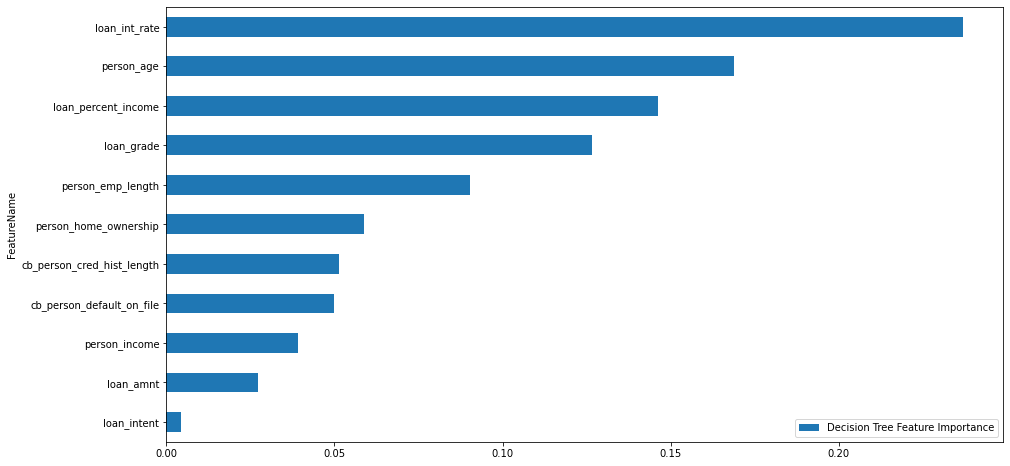

In [ ]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

***c. ROC Curve***

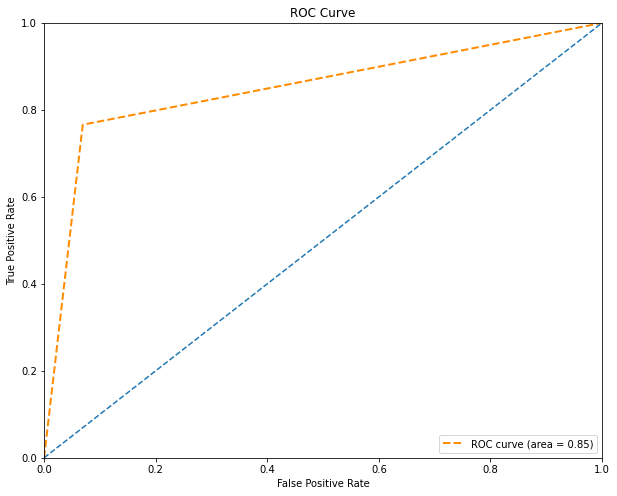

In [ ]:
y_pred_prob_test = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

**d. Plot tree**

In [ ]:
X_plot_tree = data[features]

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree.values, y.ravel())
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
for i in range(len(X_plot_tree.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree.columns[i])

X_0: loan_grade
X_1: loan_amnt
X_2: person_emp_length
X_3: loan_intent
X_4: cb_person_default_on_file
X_5: person_income
X_6: cb_person_cred_hist_length
X_7: loan_percent_income
X_8: person_home_ownership
X_9: person_age
X_10: loan_int_rate


### **7. XGB Classifier**

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

***a. Prediction***

In [ ]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[2222   14]
 [ 180  448]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2236
           1       0.97      0.71      0.82       628

    accuracy                           0.93      2864
   macro avg       0.95      0.85      0.89      2864
weighted avg       0.93      0.93      0.93      2864

XGBoost accuracy:  0.9322625698324022


In [ ]:
predict_xgb = XGB_classifier.predict_proba(X_test) # 1st col = pred val, 2nd col = pred prob

predict_xgb_prob = pd.DataFrame(predict_xgb[:,1],columns = ['Default Probability'])
predict_xgb_prob['Default'] = y_test
predict_xgb_prob

,Default Probability,Default
0,0.043238,0
1,0.978133,1
2,0.019779,0
3,0.068561,1
4,0.645115,1
...,...,...
2859,0.069838,0
2860,0.074882,0
2861,0.069584,1
2862,0.058784,0


***b. Feature Importance***

In [ ]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)

,FeatureName,XGBoost Feature Importance
7,loan_int_rate,0.273039
0,person_age,0.223104
8,loan_percent_income,0.151165
2,person_home_ownership,0.108966
5,loan_grade,0.062180
10,cb_person_cred_hist_length,0.055614
3,person_emp_length,0.053381
9,cb_person_default_on_file,0.047297
6,loan_amnt,0.015663
1,person_income,0.009590


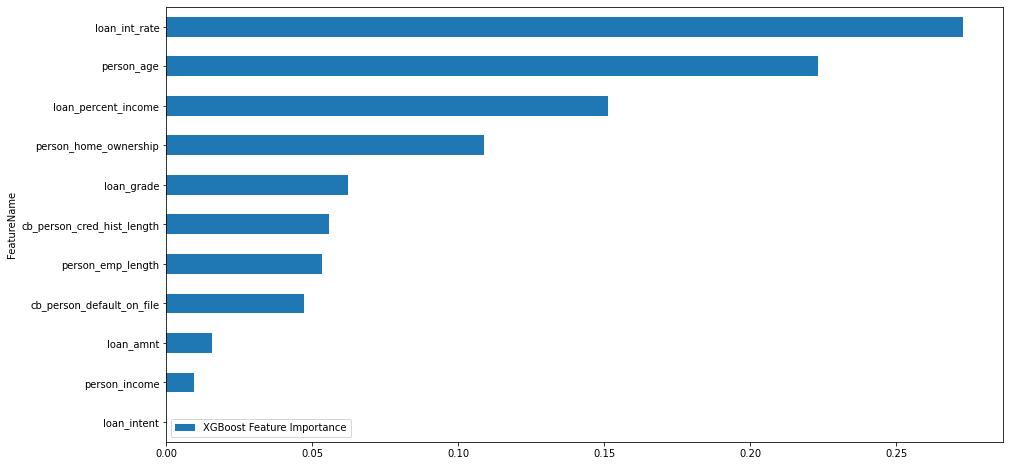

In [ ]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

***c. ROC Curve***

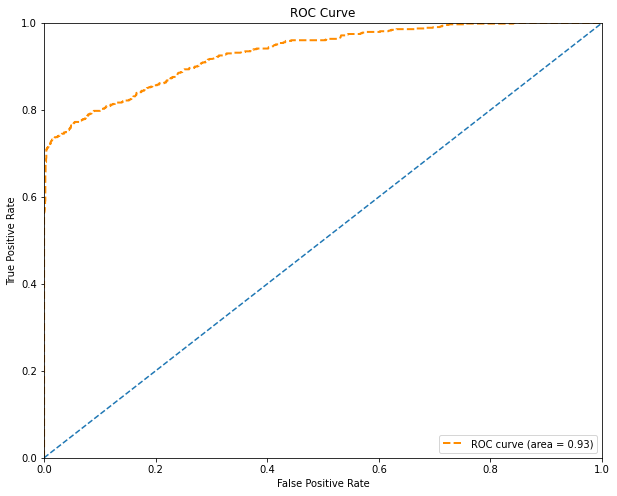

In [ ]:
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

### **8. Ada Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

**a. Prediction**

In [ ]:
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train.ravel())

y_pred = ada_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[2123  113]
 [ 216  412]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2236
           1       0.78      0.66      0.71       628

    accuracy                           0.89      2864
   macro avg       0.85      0.80      0.82      2864
weighted avg       0.88      0.89      0.88      2864

XGBoost accuracy:  0.8851256983240223


***b. Feature Importance***

In [ ]:
importance_ada = ada_classifier.feature_importances_
features_importances_ada = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'AdaBoost Feature Importance': importance_ada})
features_importances_ada.sort_values(by=['AdaBoost Feature Importance'], ascending=False)

,FeatureName,AdaBoost Feature Importance
5,loan_grade,0.34
3,person_emp_length,0.18
7,loan_int_rate,0.10
8,loan_percent_income,0.10
0,person_age,0.08
1,person_income,0.08
10,cb_person_cred_hist_length,0.08
2,person_home_ownership,0.04
4,loan_intent,0.00
6,loan_amnt,0.00


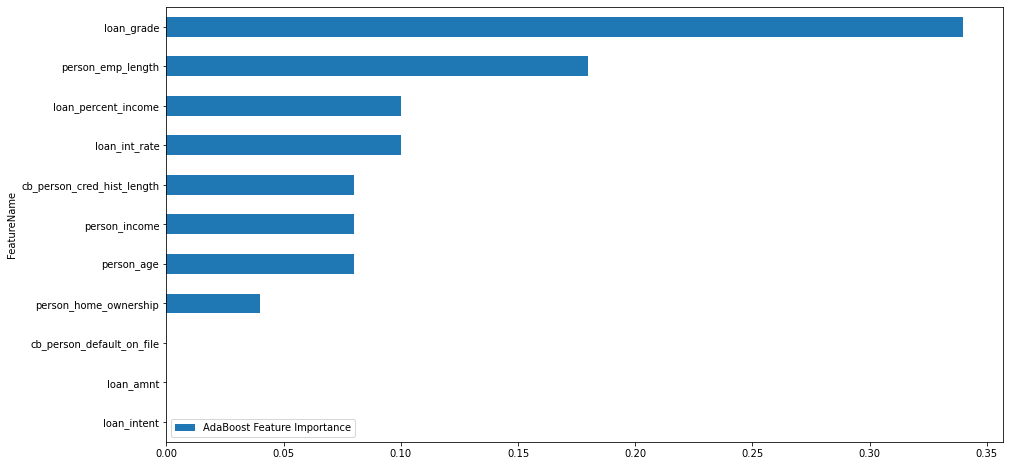

In [ ]:
features_importances_ada.sort_values("AdaBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["AdaBoost Feature Importance"], kind="barh")

**c. ROC Curve**

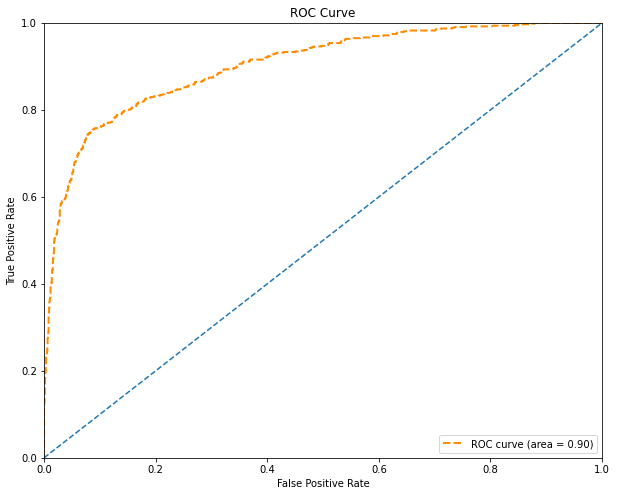

In [ ]:
y_pred_prob_test = ada_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

## **Feature Selected model**

In [ ]:
feature_set1 = features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)
feature_set1

,FeatureName,Random Forest Feature Importance
7,loan_int_rate,0.224250
5,loan_grade,0.142941
0,person_age,0.115901
10,cb_person_cred_hist_length,0.112243
8,loan_percent_income,0.105598
3,person_emp_length,0.073958
1,person_income,0.071884
2,person_home_ownership,0.061934
9,cb_person_default_on_file,0.046347
6,loan_amnt,0.034517


In [ ]:
features_selected = feature_set1['FeatureName'].head(10)
features_selected.values

array(['loan_int_rate', 'loan_grade', 'person_age',
       'cb_person_cred_hist_length', 'loan_percent_income',
       'person_emp_length', 'person_income', 'person_home_ownership',
       'cb_person_default_on_file', 'loan_amnt'], dtype=object)

In [ ]:
features_selected_2 = features_selected

In [ ]:
data_3 = data[features_selected_2]
data_3['default'] = data['default']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_3

,loan_int_rate,loan_grade,person_age,cb_person_cred_hist_length,loan_percent_income,person_emp_length,person_income,person_home_ownership,cb_person_default_on_file,loan_amnt,default
0,16.02,3,22,3,0.59,123.0,59000,0,1,35000,1
1,11.14,1,21,2,0.10,5.0,9600,2,0,1000,0
2,12.87,2,25,3,0.57,1.0,9600,1,0,5500,1
3,15.23,2,23,2,0.53,4.0,65500,0,0,35000,1
4,14.27,2,24,4,0.55,8.0,54400,0,1,35000,1
...,...,...,...,...,...,...,...,...,...,...,...
32576,13.16,2,57,30,0.11,1.0,53000,1,0,5800,0
32577,7.49,0,54,19,0.15,4.0,120000,1,0,17625,0
32578,10.99,1,65,28,0.46,3.0,76000,0,0,35000,1
32579,11.48,1,56,26,0.10,5.0,150000,1,0,15000,0


In [ ]:
target = ['default']
features = list(set(list(data_3.columns)) - set(target))

In [ ]:
X = data_3[features]
y = data_3[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train.values, y_train.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[2198   38]
 [ 530   98]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2236
           1       0.72      0.16      0.26       628

    accuracy                           0.80      2864
   macro avg       0.76      0.57      0.57      2864
weighted avg       0.79      0.80      0.75      2864

Logistic Regression accuracy:  0.8016759776536313


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
data['default'].value_counts()

0    22435
1     6203
Name: default, dtype: int64

## **Resampling**

In [ ]:
!pip install imbalanced-learn

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


#### **1. Over sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_train

,loan_grade,loan_amnt,person_emp_length,cb_person_default_on_file,person_income,cb_person_cred_hist_length,loan_percent_income,person_home_ownership,person_age,loan_int_rate
30918,0,10000,6.0,0,70000,15,0.14,1,39,6.17
28543,0,5000,11.0,0,80000,10,0.06,1,27,8.00
10245,3,9600,5.0,1,63000,4,0.15,0,25,14.46
24225,3,8000,7.0,0,70000,10,0.11,1,27,16.00
7452,2,6700,5.0,1,85000,2,0.08,0,23,15.23
...,...,...,...,...,...,...,...,...,...,...
24543,3,5450,12.0,1,74000,6,0.07,2,28,12.67
6202,2,6000,6.0,0,27000,3,0.22,0,23,11.66
991,2,6000,1.0,1,24000,4,0.25,2,22,12.68
17959,1,25000,2.0,0,225000,10,0.11,0,30,12.42


In [ ]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [ ]:
X_train_over

,loan_grade,loan_amnt,person_emp_length,cb_person_default_on_file,person_income,cb_person_cred_hist_length,loan_percent_income,person_home_ownership,person_age,loan_int_rate
0,0,10000,6.0,0,70000,15,0.14,1,39,6.17
1,0,5000,11.0,0,80000,10,0.06,1,27,8.00
2,3,9600,5.0,1,63000,4,0.15,0,25,14.46
3,3,8000,7.0,0,70000,10,0.11,1,27,16.00
4,2,6700,5.0,1,85000,2,0.08,0,23,15.23
...,...,...,...,...,...,...,...,...,...,...
40393,1,7200,6.0,0,30000,10,0.24,0,33,12.69
40394,1,9000,6.0,0,129000,24,0.07,1,54,11.49
40395,2,15450,2.0,1,34000,4,0.45,1,25,11.22
40396,3,3325,0.0,1,69000,7,0.05,0,27,16.32


In [ ]:
y_train_over

,default
0,0
1,0
2,0
3,0
4,0
...,...
40393,1
40394,1
40395,1
40396,1


In [ ]:
y_train_over.value_counts()

default
0          20199
1          20199
dtype: int64

In [ ]:
print('Predict on over-sampling trainning set')
classifier = LogisticRegression()
classifier.fit(X_train_over.values, y_train_over.values.ravel())

y_pred_train_over = classifier.predict(X_train_over)
print(confusion_matrix(y_train_over,y_pred_train_over))
print(classification_report(y_train_over,y_pred_train_over))
print('Logistic Regression accuracy: ', accuracy_score(y_train_over, y_pred_train_over))

Predict on over-sampling trainning set
[[13639  6560]
 [ 4323 15876]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.71     20199
           1       0.71      0.79      0.74     20199

    accuracy                           0.73     40398
   macro avg       0.73      0.73      0.73     40398
weighted avg       0.73      0.73      0.73     40398

Logistic Regression accuracy:  0.73060547551859


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print('Predict on testing set')
classifier = LogisticRegression()
classifier.fit(X_train_over.values, y_train_over.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

Predict on testing set
[[1532  704]
 [ 134  494]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      2236
           1       0.41      0.79      0.54       628

    accuracy                           0.71      2864
   macro avg       0.67      0.74      0.66      2864
weighted avg       0.81      0.71      0.73      2864

Logistic Regression accuracy:  0.7074022346368715


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### **2. Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X, y)

In [ ]:
X_train_under

,loan_grade,loan_amnt,person_emp_length,cb_person_default_on_file,person_income,cb_person_cred_hist_length,loan_percent_income,person_home_ownership,person_age,loan_int_rate
0,1,6800,5.0,0,34600,4,0.20,1,23,12.69
1,1,8000,10.0,0,89000,3,0.09,1,26,10.99
2,1,8000,1.0,0,35000,4,0.23,0,22,9.20
3,2,3500,5.0,0,20000,3,0.17,0,22,13.11
4,0,5200,2.0,0,60000,2,0.09,1,22,5.99
...,...,...,...,...,...,...,...,...,...,...
12401,4,7000,0.0,1,71520,24,0.10,0,52,16.82
12402,0,15000,1.0,0,40000,21,0.38,0,57,8.90
12403,1,20000,1.0,0,45600,26,0.44,0,60,10.00
12404,3,20000,4.0,1,65004,19,0.31,0,52,15.58


In [ ]:
y_train_under

,default
0,0
1,0
2,0
3,0
4,0
...,...
12401,1
12402,1
12403,1
12404,1


In [ ]:
y_train_under.value_counts()

default
0          6203
1          6203
dtype: int64

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train_under.values, y_train_under.values.ravel())

y_pred_train_under = classifier.predict(X_train_under)
print(confusion_matrix(y_train_under,y_pred_train_under))
print(classification_report(y_train_under,y_pred_train_under))
print('Logistic Regression accuracy: ', accuracy_score(y_train_under, y_pred_train_under))

[[4361 1842]
 [1497 4706]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      6203
           1       0.72      0.76      0.74      6203

    accuracy                           0.73     12406
   macro avg       0.73      0.73      0.73     12406
weighted avg       0.73      0.73      0.73     12406

Logistic Regression accuracy:  0.7308560374012575


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
classifier.fit(X_train_under.values, y_train_under.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[1606  630]
 [ 146  482]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      2236
           1       0.43      0.77      0.55       628

    accuracy                           0.73      2864
   macro avg       0.68      0.74      0.68      2864
weighted avg       0.81      0.73      0.75      2864

Logistic Regression accuracy:  0.729050279329609


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### **Predict new customer (sample on original data)**

In [ ]:
target = ['default']
features = list(set(list(data.columns)) - set(target))

In [ ]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression()

In [ ]:
import random
random_number = random.randrange(0, 100, 1)
random_number

72

In [ ]:
X_test.columns

Index(['loan_grade', 'loan_amnt', 'person_emp_length', 'loan_intent',
       'cb_person_default_on_file', 'person_income',
       'cb_person_cred_hist_length', 'loan_percent_income',
       'person_home_ownership', 'person_age', 'loan_int_rate'],
      dtype='object')

In [ ]:
sample_test = X_test.iloc[random_number].values
sample_test = sample_test.tolist()
sample_test

[1.0, 2800.0, 6.0, 0.0, 0.0, 27560.0, 4.0, 0.1, 2.0, 22.0, 11.49]

In [ ]:
sample_test = [2, 1, 2, 2760, 1, 5, 4, 5, 24, 3, 36]

In [ ]:
print(classifier.predict([sample_test]))

[0]


# **4-class classification**
- **1: Không có rủi ro**
- **2: Rủi ro trả nợ trễ kỳ (chậm trả 10 ngày)**
- **3: Rủi ro quá hạn**
- **4: Rủi ro không trả được nợ (mất khả năng trả nợ)**

### **1. Import dữ liệu**

In [ ]:
# data_4_class = pd.read_csv(path + "/german_credit_categori.csv")

In [ ]:
data_4_class = data_4_class.drop(columns=['defaut_1', 'Unnamed: 5'])

NameError: ignored

In [ ]:
data_4_class = data_4_class.rename(columns={"default_2": "default"})

In [ ]:
data_4_class['default'].value_counts()

In [ ]:
data_4_class

### **2. Thống kê mô tả**

In [ ]:
from copy import deepcopy
data_4_class_2 = deepcopy(data_4_class) 

In [ ]:
data_4_class_2.info()

In [ ]:
for col in categorical_features:
    data_4_class_2[col] = data_4_class_2[col].astype('object')

In [ ]:
data_4_class_2.info()

In [ ]:
data_4_class_2[numerical_features].describe()

In [ ]:
data_4_class_2[categorical_features].describe()

### **3. Correlation**

In [ ]:
data_4_class.corr()

In [ ]:
pd.DataFrame(data_4_class.corr().iloc[1:,0])

In [ ]:
correlation_2 = data_4_class.corr().iloc[1:,0].values

In [ ]:
features_importances_corr = pd.DataFrame({'FeatureName': data_4_class[column_selected].columns[0:len(data_4_class[column_selected])-1], 'Pearson Correlation with target': correlation_2})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

In [ ]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

### **4. Random Forest Feature Importance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
target = ['default']
features = list(set(list(data_4_class.columns)) - set(target))

In [ ]:
print('Target: ', target)
print('Features: ', features)

In [ ]:
X = data_4_class[features].values
y = data_4_class[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

***a. Prediction***

In [ ]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

***b. Feature Importance***

In [ ]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

In [ ]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

***c. ROC Curve***

In [ ]:
# y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
# fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
# roc_auc = auc(fpr, tpr)

# _plot_roc_curve(fpr, tpr, thres, roc_auc)

In [ ]:
# y_prob = classifier.predict_proba(X_test)

# macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
# weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
# macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
# weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")

# print(
#     "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
#     "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
# )
# print(
#     "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
#     "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
# )

### **5.Logistic Regression**

**a. Prediction**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(multi_class='multinomial')
LR_classifier.fit(X_train, y_train.ravel())

y_pred = LR_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
df_report_2 = pd.DataFrame({'Ground Truth':y_test.ravel(), 'Prediction':y_pred.ravel()})
df_report_2

In [ ]:
df_report.to_excel(r'gdrive/My Drive/0320 - Credit Scoring Book demo/predicted 4 classes.xlsx', index=False)

**b. Feature Importance**

In [ ]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': data_4_class.columns[0:len(data_4_class.columns)-1], 'Logistic Regression Feature Importance': importance_lr})
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

In [ ]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

### **6. Decision Tree Classifier**

**a. Predection**

In [ ]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

**b. Feature Importance**

In [ ]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

In [ ]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

**c. Plot tree**

In [ ]:
X_plot_tree_2 = data_4_class[features]

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree_2.values, y.ravel())
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
for i in range(len(X_plot_tree_2.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree_2.columns[i])

### **7. XGB Classifier** 

**a. Prediction**

In [ ]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

**b. Feature Importance**

In [ ]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)

In [ ]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

### **8. Ada Boost Classifier**

**a. Prediction**

In [ ]:
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train.ravel())

y_pred = ada_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

**b. Feature Importance**

In [ ]:
importance_ada = ada_classifier.feature_importances_
features_importances_ada = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'AdaBoost Feature Importance': importance_ada})
features_importances_ada.sort_values(by=['AdaBoost Feature Importance'], ascending=False)

In [ ]:
features_importances_ada.sort_values("AdaBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["AdaBoost Feature Importance"], kind="barh")

## **Resampling**

In [ ]:
X = data_4_class[features]
y = data_4_class[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

#### **1. Over sampling**

In [ ]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [ ]:
X_train_over

In [ ]:
y_train_over

In [ ]:
y_train_over.value_counts()

In [ ]:
print('Predict on testing set')
classifier = LogisticRegression()
classifier.fit(X_train_over.values, y_train_over.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

#### **2. Under Sampling**

In [ ]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X, y)

In [ ]:
X_train_under

In [ ]:
y_train_under

In [ ]:
classifier.fit(X_train_under.values, y_train_under.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

#### **Predict new borrower**

In [ ]:
target = ['default']
features = list(set(list(data_4_class.columns)) - set(target))

In [ ]:
X = data_4_class[features]
y = data_4_class[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train.values, y_train.values.ravel())

In [ ]:
import random
random = random.randrange(0, 100, 1)
random

In [ ]:
X_test.columns

In [ ]:
sample_test = [2, 1, 2, 2760, 1, 5, 4, 5, 24, 3, 36, 3, 1, 4, 4, 3, 1, 1, 1, 2]

In [ ]:
sample_test = X_test.iloc[random].values
sample_test = sample_test.tolist()
sample_test

In [ ]:
print(classifier.predict([sample_test]))